# MODELING OF MAGNETIC FIELDS USING PSO ALGORITHM
## ---------------------------
## Modeling Modes Available:
## -1 Dipole
## -2 Dipoles
## -1 Dipole & 1 Quadrupole
## -Comparison
## ---------------------------
### Version 1 - Date 14/06/22
### Author: Víctor Vegas Luque - victorvegas24@gmail.com

# LIBRARIES

In [1]:
# Importo PANDAS: me permite leer los datos directamente del Excel. AS PD sirve para ponerle un alias y hacer el codigo mas legible
import pandas as pd

# Importo NUMPY: una biblioteca que me permite crear matrices y vectores

import numpy as np
from numpy import random
# Importo varias librerias que me pertmiten hacer cosas de matematicas y plots.
import math 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from plotly.subplots import make_subplots

#We import scipy, which contains functions for complete elliptic integral of the first and second kind. It also contains rotation matrices
import scipy
from scipy import special
#scipy.special.ellipk - First kind
#scipy.special.ellipe - Second kind
from scipy.spatial.transform import Rotation as R

In [2]:
#Para imprimir cadenas en colores
from colorama import Fore, Back, Style

# Python program to print
# colored text and background
class colors:
    
#Colors class:reset all colors with colors.reset; two sub classes fg for foreground
# and bg for background; use as colors.subclass.colorname.
# i.e. colors.fg.red or colors.bg.greenalso, the generic bold, disable,
# underline, reverse, strike through, and invisible work with the main class i.e. colors.bold

    reset='\033[0m'
    bold='\033[01m'
    disable='\033[02m'
    underline='\033[04m'
    reverse='\033[07m'
    strikethrough='\033[09m'
    invisible='\033[08m'
    class fg:
        black='\033[30m'
        red='\033[31m'
        green='\033[32m'
        orange='\033[33m'
        blue='\033[34m'
        purple='\033[35m'
        cyan='\033[36m'
        lightgrey='\033[37m'
        darkgrey='\033[90m'
        lightred='\033[91m'
        lightgreen='\033[92m'
        yellow='\033[93m'
        lightblue='\033[94m'
        pink='\033[95m'
        lightcyan='\033[96m'
    class bg:
        black='\033[40m'
        red='\033[41m'
        green='\033[42m'
        orange='\033[43m'
        blue='\033[44m'
        purple='\033[45m'
        cyan='\033[46m'
        lightgrey='\033[47m'


In [3]:
from PSO_python import Enjambre
from PSO_python import Particula

# READING THE DATA

In [4]:
#Identificamos el archivo donde estan nuestros datos el excel
Data_File=".\Data_IN_ESA\Motor_alone_25cm.xlsx"

In [5]:
#Vamos a leer las posicionesde los magnetometros directamente del excel
#Para leer el excel usamos read.excel(NOMBRE DEL ARCHIVO DESIGNADO ANTES) de PANDA
#Parametros adicionales:
#sheet_name=0,1,2... para indicar el numero de la 'pagina' del excel en la que se encuentran nuestros datos. También valdría poner "NOMBRE_PAGINA".
#skiprows=0,1,2... para indicar el numero de lineas que me salto. También se puede especificar las páginas que me salto indicandolo cocmo [1,4,27,...]
#nrows=0,1,2 para indicar el numero de lineas que leo
#usecols=3,4,5 para indicar las columnas que leo. También se puede poner com "C,D,E".
#header=0 para leer un cabezero. =None para no ponerlo
pos_mag1=pd.read_excel(Data_File,header=None,sheet_name=0,skiprows=36,nrows=1,usecols=[2,3,4])
pos_mag2=pd.read_excel(Data_File,header=None,sheet_name=0,skiprows=36,nrows=1,usecols=[5,6,7])
pos_mag3=pd.read_excel(Data_File,header=None,sheet_name=0,skiprows=36,nrows=1,usecols=[8,9,10])
pos_mag4=pd.read_excel(Data_File,header=None,sheet_name=0,skiprows=36,nrows=1,usecols=[11,12,13])

print(colors.fg.purple +colors.bold + "Posición del Magnetómetro 1=" + str( pos_mag1.loc[0].unique())+ " cm"+ colors.reset )
print(colors.fg.red +colors.bold + "Posición del Magnetómetro 2=" + str( pos_mag2.loc[0].unique())+ " cm"+ colors.reset )
print(colors.fg.blue +colors.bold + "Posición del Magnetómetro 3=" + str( pos_mag3.loc[0].unique())+ " cm"+ colors.reset )
print(colors.fg.green +colors.bold + "Posición del Magnetómetro 4=" + str( pos_mag4.loc[0].unique())+ " cm"+ colors.reset )

#A pesar de que los magnetometros se encuentran siempre en las mismas posiciones, dentro del propio magnetometro el campo magnetico en cada
#dirección se mide en posiciones ligeramente distintas. Estas diferencias en las posiciones de medidas se encuentran a lo largo del eje mayor
#del magnetometro (Eje Z en la imagen).
#En el caso del magnetometro 2 y 3 , colocados en vertical, coincide con el eje Z; sin embargo el magnetomegro 4 al estar en horizontal
#las diferentes medidas se llevan a cabo a lo largo del eje X.

ref_hole1=pd.read_excel(Data_File,header=None,sheet_name=0,skiprows=37,nrows=3,usecols=[2,3,4])
ref_hole2=pd.read_excel(Data_File,header=None,sheet_name=0,skiprows=37,nrows=3,usecols=[5,6,7])
ref_hole3=pd.read_excel(Data_File,header=None,sheet_name=0,skiprows=37,nrows=3,usecols=[8,9,10])
ref_hole4=pd.read_excel(Data_File,header=None,sheet_name=0,skiprows=37,nrows=3,usecols=[11,12,13])

Posición del Magnetómetro 1=[22.4  0.  32.3] cm
Posición del Magnetómetro 2=[26.7 -5.4 13.5] cm
Posición del Magnetómetro 3=[26.7  0.   3.5] cm
Posición del Magnetómetro 4=[22.4 -5.4 -9.7] cm


In [6]:
#Ahora mismo tenemos los datos en variables datafile, sin embargo nos interesa tenerlos en formato numpy, ya que es mas facil trabajar con ellos

#.to.numpy pasa de un datafile a una matriz. Al poner [0] al final se toma la primera fila, y queda por lo tanto un array
array_pos_mag1=pos_mag1.to_numpy()[0]
array_pos_mag2=pos_mag2.to_numpy()[0]
array_pos_mag3=pos_mag3.to_numpy()[0]
array_pos_mag4=pos_mag4.to_numpy()[0]

array_ref_hole1=ref_hole1.to_numpy()
array_ref_hole2=ref_hole2.to_numpy()
array_ref_hole3=ref_hole3.to_numpy()
array_ref_hole4=ref_hole4.to_numpy()

print(colors.fg.purple +colors.bold + "Posición del Magnetómetro 1=" + str(array_pos_mag1)+ " cm"+ colors.reset )
print(colors.fg.red +colors.bold + "Posición del Magnetómetro 2=" + str(array_pos_mag2)+ " cm"+ colors.reset )
print(colors.fg.blue +colors.bold + "Posición del Magnetómetro 3=" + str(array_pos_mag3)+ " cm"+ colors.reset )
print(colors.fg.green +colors.bold + "Posición del Magnetómetro 4=" + str(array_pos_mag4)+ " cm"+ colors.reset )


Posición del Magnetómetro 1=[22.4  0.  32.3] cm
Posición del Magnetómetro 2=[26.7 -5.4 13.5] cm
Posición del Magnetómetro 3=[26.7  0.   3.5] cm
Posición del Magnetómetro 4=[22.4 -5.4 -9.7] cm


In [7]:
#Leemos los valores medidios experimetalmente del excel
data_magnetometro1_meas=pd.read_excel(Data_File,header=None,sheet_name=2,skiprows=3,usecols=[1,2,4,6,8])
data_magnetometro2_meas=pd.read_excel(Data_File,header=None,sheet_name=3,skiprows=3,usecols=[1,2,4,6,8])
data_magnetometro3_meas=pd.read_excel(Data_File,header=None,sheet_name=4,skiprows=3,usecols=[1,2,4,6,8])
data_magnetometro4_meas=pd.read_excel(Data_File,header=None,sheet_name=5,skiprows=3,usecols=[1,2,4,6,8])
#Los pasamos a arrays
array_data_magnetometro1_meas=data_magnetometro1_meas.to_numpy()
array_data_magnetometro2_meas=data_magnetometro2_meas.to_numpy()
array_data_magnetometro3_meas=data_magnetometro3_meas.to_numpy()
array_data_magnetometro4_meas=data_magnetometro4_meas.to_numpy()

#Tambien leemos los datos teoricos de la ESA

data_magnetometro1_teo=pd.read_excel(Data_File,header=None,sheet_name=2,skiprows=3,usecols=[1,3,5,7,9])
data_magnetometro2_teo=pd.read_excel(Data_File,header=None,sheet_name=3,skiprows=3,usecols=[1,3,5,7,9])
data_magnetometro3_teo=pd.read_excel(Data_File,header=None,sheet_name=4,skiprows=3,usecols=[1,3,5,7,9])
data_magnetometro4_teo=pd.read_excel(Data_File,header=None,sheet_name=5,skiprows=3,usecols=[1,3,5,7,9])

#Los pasamos a arrays
array_data_magnetometro1_teo=data_magnetometro1_teo.to_numpy()
array_data_magnetometro2_teo=data_magnetometro2_teo.to_numpy()
array_data_magnetometro3_teo=data_magnetometro3_teo.to_numpy()
array_data_magnetometro4_teo=data_magnetometro4_teo.to_numpy()

In [8]:
#Leemos del array los valores para cada componente del campo magnetico.[:,x] me indica que tomamos los valores de la columna x para todas las filas
Bx_magnetometer1_meas=array_data_magnetometro1_meas[:,1]
By_magnetometer1_meas=array_data_magnetometro1_meas[:,2]
Bz_magnetometer1_meas=array_data_magnetometro1_meas[:,3]

Bx_magnetometer2_meas=array_data_magnetometro2_meas[:,1]
By_magnetometer2_meas=array_data_magnetometro2_meas[:,2]
Bz_magnetometer2_meas=array_data_magnetometro2_meas[:,3]

Bx_magnetometer3_meas=array_data_magnetometro3_meas[:,1]
By_magnetometer3_meas=array_data_magnetometro3_meas[:,2]
Bz_magnetometer3_meas=array_data_magnetometro3_meas[:,3]


Bx_magnetometer4_meas=array_data_magnetometro4_meas[:,1]
By_magnetometer4_meas=array_data_magnetometro4_meas[:,2]
Bz_magnetometer4_meas=array_data_magnetometro4_meas[:,3]

Bx_meas=np.array([Bx_magnetometer1_meas,Bx_magnetometer2_meas,Bx_magnetometer3_meas,Bx_magnetometer4_meas])/(10**9)
By_meas=np.array([By_magnetometer1_meas,By_magnetometer2_meas,By_magnetometer3_meas,By_magnetometer4_meas])/(10**9)
Bz_meas=np.array([Bz_magnetometer1_meas,Bz_magnetometer2_meas,Bz_magnetometer3_meas,Bz_magnetometer4_meas])/(10**9)


Bx_magnetometer1_teo=array_data_magnetometro1_teo[:,1]
By_magnetometer1_teo=array_data_magnetometro1_teo[:,2]
Bz_magnetometer1_teo=array_data_magnetometro1_teo[:,3]


Bx_magnetometer2_teo=array_data_magnetometro2_teo[:,1]
By_magnetometer2_teo=array_data_magnetometro2_teo[:,2]
Bz_magnetometer2_teo=array_data_magnetometro2_teo[:,3]

Bx_magnetometer3_teo=array_data_magnetometro3_teo[:,1]
By_magnetometer3_teo=array_data_magnetometro3_teo[:,2]
Bz_magnetometer3_teo=array_data_magnetometro3_teo[:,3]


Bx_magnetometer4_teo=array_data_magnetometro4_teo[:,1]
By_magnetometer4_teo=array_data_magnetometro4_teo[:,2]
Bz_magnetometer4_teo=array_data_magnetometro4_teo[:,3]

print(colors.fg.purple +colors.bold + "Campo magnetico X Magnetometro 1 Medido=\n" + str(Bx_magnetometer1_meas)+ " [nT]"+ colors.reset )
print(Fore.RED +colors.bold + "Campo magnetico X Magnetometro 2 Medido=\n" + str(Bx_magnetometer2_meas)+ " [nT]"+ colors.reset )
print(Fore.BLUE +colors.bold + "Campo magnetico X Magnetometro 3 Medido=\n" + str(Bx_magnetometer3_meas)+ " [nT]"+ colors.reset )
print(Fore.GREEN +colors.bold + "Campo magnetico X Magnetometro 4 Medido=\n" + str(Bx_magnetometer4_meas)+ " [nT]"+ colors.reset )

Campo magnetico X Magnetometro 1 Medido=
[ 1.5  1.5  1.5  1.8  2.4  2.4  2.2  2.3  1.8  0.7  0.5  1.8  2.9  3.7
  4.   3.1  3.1  2.8  1.6  1.3  1.4  1.4  2.2  3.5  3.9  4.   4.3  4.2
  3.6  3.   2.7  2.1  1.9  2.8  3.6  3.8  4.2  4.6  4.5  4.5  4.7  4.1
  3.2  2.7  2.8  3.4  4.4  5.1  5.   4.4  4.1  3.8  3.6  3.4  3.7  3.9
  3.9  4.3  4.9  5.1  5.1  5.1  4.9  4.3  3.7  3.6  4.1  4.3  4.3  4.6
  5.1  5.6  5.6  5.1  5.2  4.7  4.1  3.6  3.8  4.5  5.1  5.2  5.6  6.2
  6.1  5.2  4.5  4.4  4.2  4.2  4.7  5.   5.1  5.1  5.4  5.9  6.   5.7
  5.2  4.6  4.4  4.6  5.2  5.   4.8  4.9  5.4  5.7  5.6  5.4  5.   4.
  3.5  4.1  4.9  5.1  5.   4.9  4.7  4.3  4.1  3.6  3.8  4.1  3.8  3.8
  4.4  4.9  5.   5.   4.7  3.8  3.6  3.8  3.3  2.6  2.8  3.5  4.2  4.5
  4.1  3.8  3.8  3.3  2.7  2.5  2.9  3.1  3.5  3.9  4.2  4.2  3.9  3.5
  2.7  1.6  1.5  2.   2.7  3.1  3.2  3.2  3.   3.   2.8  2.5  2.2  1.5
  1.2  1.4  2.   2.4  2.4  2.   1.8  2.2  2.5  2.1  1.4  1.5  2.   1.7
  1.4  1.6  2.1  2.7  2.3  1.6  1.1  

In [9]:
#THEORICAL ESA:
Bx_ESA=np.array([Bx_magnetometer1_teo,Bx_magnetometer2_teo,Bx_magnetometer3_teo,Bx_magnetometer4_teo])
By_ESA=np.array([By_magnetometer1_teo,By_magnetometer2_teo,By_magnetometer3_teo,By_magnetometer4_teo])
Bz_ESA=np.array([Bz_magnetometer1_teo,Bz_magnetometer2_teo,Bz_magnetometer3_teo,Bz_magnetometer4_teo])
#MEASURED:
Bx_meas=np.array([Bx_magnetometer1_meas,Bx_magnetometer2_meas,Bx_magnetometer3_meas,Bx_magnetometer4_meas])
By_meas=np.array([By_magnetometer1_meas,By_magnetometer2_meas,By_magnetometer3_meas,By_magnetometer4_meas])
Bz_meas=np.array([Bz_magnetometer1_meas,Bz_magnetometer2_meas,Bz_magnetometer3_meas,Bz_magnetometer4_meas])


In [10]:
#Tambien creamos un array con los angulos, leyendo la primera columna de cualquiera de los arrays creados a partir de los datafile
phi=array_data_magnetometro2_meas[:,0]
#Creamos uno en radianes tambien
phi_rad=phi*math.pi/180

Calculamos los campos magneticos mediante la aproximación dipolar usando las siguientes expresiones

$\textbf{B}_x=\dfrac{\mu_0 }{4\pi}\left(\dfrac{3\left(m_x(x-x_0)+m_y(y-y_0)+m_z(z-z_0)\right)(x-x_0)}{r^5}-\dfrac{m_x}{r^3}\right) $

$\textbf{B}_y=\dfrac{\mu_0 }{4\pi}\left(\dfrac{3\left(m_x(x-x_0)+m_y(y-y_0)+m_z(z-z_0)\right)(y-y_0)}{r^5}-\dfrac{m_y}{r^3}\right) $

$\textbf{B}_z=\dfrac{\mu_0 }{4\pi}\left(\dfrac{3\left(m_x(x-x_0)+m_y(y-y_0)+m_z(z-z_0)\right)(z-z_0)}{r^5}-\dfrac{m_z}{r^3}\right) $

In [11]:
#Definimos la funcion para el calculo del campo magnético a partir de los momentos dipolares

#Como el disco gira alrededor del eje Z, es de especial interes definir una funcioon que nos calcule el campo magnetico en el eje Z y otra
#en el eje X e Y. La razón de esto se explicara despues.
'''
#Funcion que calcula en campo magnetico en todas las direcciones a partir de un dipolo
def B_field(mx,my,mz,x0,y0,z0,X,Y,Z):
    mu=4.0*math.pi*10**(-7.0)
    k=mu/(4.0*math.pi)
    R=np.sqrt((X-x0)**2.0+(Y-y0)**2+(Z-z0)**2)
    mR=mx*(X-x0)+my*(Y-y0)+mz*(Z-z0)
    
    Bx=k*(-(mx/R**3.0)+((3.0*(X-x0)*mR)/R**5.0))
    By=k*(-(my/R**3.0)+((3.0*(Y-y0)*mR)/R**5.0))
    Bz=k*(-(mz/R**3.0)+((3.0*(Z-z0)*mR)/R**5.0))
    
    return Bx,By,Bz
    
'''


def Bx_field(mx,my,mz,x0,y0,z0,X,Y,Z):
    mu=4.0*math.pi*10**(-7.0)
    k=mu/(4.0*math.pi)
    
    R=np.sqrt((X-x0)**2.0+(Y-y0)**2+(Z-z0)**2)
    mR=mx*(X-x0)+my*(Y-y0)+mz*(Z-z0)
    

    Bx=k*(-(mx/R**3.0)+((3.0*(X-x0)*mR)/R**5.0))

    
    return Bx*10**12

def By_field(mx,my,mz,x0,y0,z0,X,Y,Z):
    mu=4.0*math.pi*10**(-7.0)
    k=mu/(4.0*math.pi)
    R=np.sqrt((X-x0)**2.0+(Y-y0)**2+(Z-z0)**2)
    mR=mx*(X-x0)+my*(Y-y0)+mz*(Z-z0)
    

    By=k*(-(my/R**3.0)+((3.0*(Y-y0)*mR)/R**5.0))
    
    return By*10**12

def Bz_field(mx,my,mz,x0,y0,z0,X,Y,Z):
    mu=4.0*math.pi*10**(-7.0)
    k=mu/(4.0*math.pi)
    
    R=np.sqrt((X-x0)**2.0+(Y-y0)**2+(Z-z0)**2)
    mR=mx*(X-x0)+my*(Y-y0)+mz*(Z-z0)
    

    Bz=k*(-(mz/R**3.0)+((3.0*(Z-z0)*mR)/R**5.0))
    
    return Bz*10**12

In [12]:
def Bxyz_UnDip(x0_d1,y0_d1,z0_d1,mx_d1,my_d1,mz_d1):


    
    Bx_test_X=Bx_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[0],Y[0],Z[0])
    By_test_X=By_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[0],Y[0],Z[0])
    
    
    Bx_test_Y=Bx_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[1],Y[1],Z[1])
    By_test_Y=By_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[1],Y[1],Z[1])
    
    Bz=Bz_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[2],Y[2],Z[2])
    
    Bx=np.zeros_like(Bx_test_X)
    By=np.zeros_like(Bx_test_X)

    
    Bx[0]=Bx_test_X[0]*np.cos(phi_rad)-By_test_X[0]*np.sin(phi_rad)
    Bx[1]=Bx_test_X[1]*np.cos(phi_rad)-By_test_X[1]*np.sin(phi_rad)
    Bx[2]=Bx_test_X[2]*np.cos(phi_rad)-By_test_X[2]*np.sin(phi_rad)
    Bx[3]=Bx_test_X[3]*np.cos(phi_rad)-By_test_X[3]*np.sin(phi_rad)
    
    By[0]=Bx_test_Y[0]*np.sin(phi_rad)+By_test_Y[0]*np.cos(phi_rad)
    By[1]=Bx_test_Y[1]*np.sin(phi_rad)+By_test_Y[1]*np.cos(phi_rad)
    By[2]=Bx_test_Y[2]*np.sin(phi_rad)+By_test_Y[2]*np.cos(phi_rad)
    By[3]=Bx_test_Y[3]*np.sin(phi_rad)+By_test_Y[3]*np.cos(phi_rad)
    return Bx,By,Bz

In [13]:
#Calculamos los campos magneticos usando las funciones antes definida
#Como tenemos dos dipolos, primeramente calculamos los campos magneticos generados por cada uno por separados y luego los sumamos
#El eje Z no cambia a pesar de que el disco gire, sin embargo los ejes X e Y del disco si que giran respecto a los del magnetoemtro
#Lo que vamos a hacer es calcular el campo magnetico considerando que nuestro disco no gira, y luego proyectaremos adecuadamente sobre los ejes de cada magnetometr

def Bxyz_DosDip(x0_d1,y0_d1,z0_d1,mx_d1,my_d1,mz_d1,x0_d2,y0_d2,z0_d2,mx_d2,my_d2,mz_d2):


    
    Bx_test_X=Bx_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[0],Y[0],Z[0])
    By_test_X=By_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[0],Y[0],Z[0])
    
    Bx_test_X=Bx_test_X+Bx_field(mx_d2,my_d2,mz_d2,x0_d2,y0_d2,z0_d2,X[0],Y[0],Z[0])
    By_test_X=By_test_X+By_field(mx_d2,my_d2,mz_d2,x0_d2,y0_d2,z0_d2,X[0],Y[0],Z[0])
    
    
    Bx_test_Y=Bx_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[1],Y[1],Z[1])
    By_test_Y=By_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[1],Y[1],Z[1])
    
    Bx_test_Y=Bx_test_Y+Bx_field(mx_d2,my_d2,mz_d2,x0_d2,y0_d2,z0_d2,X[1],Y[1],Z[1])
    By_test_Y=By_test_Y+By_field(mx_d2,my_d2,mz_d2,x0_d2,y0_d2,z0_d2,X[1],Y[1],Z[1])
    
    Bz=Bz_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[2],Y[2],Z[2])
    

    Bz=Bz+Bz_field(mx_d2,my_d2,mz_d2,x0_d2,y0_d2,z0_d2,X[2],Y[2],Z[2])
    
    Bx=np.zeros_like(Bx_test_X)
    By=np.zeros_like(Bx_test_X)

    for i in range (0,len(Bx)):
        Bx[i]=Bx_test_X[i]*np.cos(phi_rad)-By_test_X[i]*np.sin(phi_rad)
        By[i]=Bx_test_Y[i]*np.sin(phi_rad)+By_test_Y[i]*np.cos(phi_rad)

    return Bx,By,Bz

# MAGNETIC FIELD CREATED BY A SPIRE

Field components:

\begin{equation}
B_x=\frac{Cxz}{2\alpha^2\beta\rho^2}\left[(a^2+r^2)E(k^2)-\alpha^2 K(k^2)\right] 
\end{equation}

\begin{equation}
B_y=\frac{Cyz}{2\alpha^2\beta\rho^2}\left[(a^2+r^2)E(k^2)-\alpha^2 K(k^2)\right] 
\end{equation}

\begin{equation}
B_z=\frac{C}{2\alpha^2\beta}\left[(a^2-r^2)E(k^2)+ \alpha^2 K(k^2)\right]
\end{equation}

\begin{equation}
\rho^2 \equiv x^2+y^2 \ \ ; \ \ r^2\equiv x^2+y^2+z^2 \ \ ; \ \ \alpha^2\equiv a^2+r^2-2a\rho
\end{equation}

\begin{equation}
\beta^2\equiv a^2+r^2+2a\rho \ \ ; \ \ k^2 \equiv 1-\alpha^2/\beta^2 \ \ ; \ \ \gamma^2\equiv x^2-y^2
\end{equation}

In [14]:

def rho_square(X,Y):
    rho_square=X*X+Y*Y
    return rho_square
def r_square(X,Y,Z):
    r_square=X*X+Y*Y+Z*Z
    return r_square

    
def alpha_square(radius,X,Y,Z):
    alpha_square=radius*radius+r_square(X,Y,Z)-2*radius*(np.sqrt(rho_square(X,Y)))
    return alpha_square
def beta_square(radius,X,Y,Z):
    beta_square=radius*radius+r_square(X,Y,Z)+2*radius*(np.sqrt(rho_square(X,Y)))
    return beta_square
def k_square(radius,X,Y,Z):
    k_square=1-(alpha_square(radius,X,Y,Z)/beta_square(radius,X,Y,Z))
    return k_square
def gamma_square(X,Y):
    gamma_square=X*X-Y*Y
    return gamma_square

In [15]:

def Bx_spire(I,radius,X,Y,Z):
    C=mu=4.0*I*10**(-7.0)
    Bx=C*X*Z*((radius*radius+r_square(X,Y,Z))*scipy.special.ellipe(k_square(radius,X,Y,Z))-(alpha_square(radius,X,Y,Z))*scipy.special.ellipk(k_square(radius,X,Y,Z)))/(2*(alpha_square(radius,X,Y,Z))*np.sqrt(beta_square(radius,X,Y,Z))*rho_square(X,Y))
    
    return Bx

def By_spire(I,radius,X,Y,Z):
    C=mu=4.0*I*10**(-7.0)
    By=C*Y*Z*((radius*radius+r_square(X,Y,Z))*scipy.special.ellipe(k_square(radius,X,Y,Z))-(alpha_square(radius,X,Y,Z))*scipy.special.ellipk(k_square(radius,X,Y,Z)))/(2*(alpha_square(radius,X,Y,Z))*np.sqrt(beta_square(radius,X,Y,Z))*rho_square(X,Y))
    
    return By

def Bz_spire(I,radius,X,Y,Z):
    C=mu=4.0*I*10**(-7.0)
    Bz=C*((radius*radius-r_square(X,Y,Z))*scipy.special.ellipe(k_square(radius,X,Y,Z))+(alpha_square(radius,X,Y,Z))*scipy.special.ellipk(k_square(radius,X,Y,Z)))/(2*(alpha_square(radius,X,Y,Z))*np.sqrt(beta_square(radius,X,Y,Z)))
    return Bz

In [16]:
def B_quad(I,radius,x_0,y_0,z_0,phi,theta,X,Y,Z):
    r=R.from_euler('xz',[[theta,phi]], degrees=True)
    r_matrix=r.as_matrix()[0]
    r_matrix_inverse=np.linalg.inv(r_matrix)
    OFFSET_1=np.tensordot(r_matrix,np.array([0,0,radius]),axes=1)
    OFFSET_2=np.tensordot(r_matrix,np.array([0,0,-radius]),axes=1)
    
    OFFSET_1=OFFSET_1+[x_0,y_0,z_0]
    OFFSET_2=OFFSET_2+[x_0,y_0,z_0]

    
    
    X_1_OFFSET=X-OFFSET_1[0]*np.ones_like(X)
    Y_1_OFFSET=Y-OFFSET_1[1]*np.ones_like(Y)
    Z_1_OFFSET=Z-OFFSET_1[2]*np.ones_like(Z)
    
    X_2_OFFSET=X-OFFSET_2[0]*np.ones_like(X)
    Y_2_OFFSET=Y-OFFSET_2[1]*np.ones_like(Y)
    Z_2_OFFSET=Z-OFFSET_2[2]*np.ones_like(Z)
    
    COORD_1_OFFSET=[X_1_OFFSET,Y_1_OFFSET,Z_1_OFFSET]
    COORD_2_OFFSET=[X_2_OFFSET,Y_2_OFFSET,Z_2_OFFSET]
    
    COORD_1_OFFSET_ROT=np.tensordot(r_matrix_inverse,np.array(COORD_1_OFFSET),axes=1)
    COORD_2_OFFSET_ROT=np.tensordot(r_matrix_inverse,np.array(COORD_2_OFFSET),axes=1)
    
    Bx_1_ROT=Bx_spire(I,radius,COORD_1_OFFSET_ROT[0],COORD_1_OFFSET_ROT[1],COORD_1_OFFSET_ROT[2])
    By_1_ROT=By_spire(I,radius,COORD_1_OFFSET_ROT[0],COORD_1_OFFSET_ROT[1],COORD_1_OFFSET_ROT[2])
    Bz_1_ROT=Bz_spire(I,radius,COORD_1_OFFSET_ROT[0],COORD_1_OFFSET_ROT[1],COORD_1_OFFSET_ROT[2])
    
    Bx_2_ROT=Bx_spire(-I,radius,COORD_2_OFFSET_ROT[0],COORD_2_OFFSET_ROT[1],COORD_2_OFFSET_ROT[2])
    By_2_ROT=By_spire(-I,radius,COORD_2_OFFSET_ROT[0],COORD_2_OFFSET_ROT[1],COORD_2_OFFSET_ROT[2])
    Bz_2_ROT=Bz_spire(-I,radius,COORD_2_OFFSET_ROT[0],COORD_2_OFFSET_ROT[1],COORD_2_OFFSET_ROT[2])


    Bx_quad_ROT=Bx_1_ROT+Bx_2_ROT
    By_quad_ROT=By_1_ROT+By_2_ROT
    Bz_quad_ROT=Bz_1_ROT+Bz_2_ROT

    B_quad_ROT=np.array([Bx_quad_ROT,By_quad_ROT,Bz_quad_ROT])
    B_quad=np.tensordot(r_matrix,np.array(B_quad_ROT),axes=1)
    return B_quad*10**(11)

In [17]:
def Bxyz_1Dip1Quad(x0_d1,y0_d1,z0_d1,mx_d1,my_d1,mz_d1,a,I,px0,py0,pz0,phi0,theta0):


    
    Bx_test_X=Bx_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[0],Y[0],Z[0])
    By_test_X=By_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[0],Y[0],Z[0])
    
    Bx_test_X=Bx_test_X+B_quad(a,I,px0,py0,pz0,phi0,theta0,X[0],Y[0],Z[0])[0]
    By_test_X=By_test_X+B_quad(a,I,px0,py0,pz0,phi0,theta0,X[0],Y[0],Z[0])[1]
    
    
    
    Bx_test_Y=Bx_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[1],Y[1],Z[1])
    By_test_Y=By_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[1],Y[1],Z[1])
    
    Bx_test_Y=Bx_test_Y+B_quad(a,I,px0,py0,pz0,phi0,theta0,X[1],Y[1],Z[1])[0]
    By_test_Y=By_test_Y+B_quad(a,I,px0,py0,pz0,phi0,theta0,X[1],Y[1],Z[1])[1]
    
    Bz=Bz_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[2],Y[2],Z[2])
    
    Bz=Bz+B_quad(a,I,px0,py0,pz0,phi0,theta0,X[2],Y[2],Z[2])[2]
    
    Bx=np.zeros_like(Bx_test_X)
    By=np.zeros_like(Bx_test_X)

    for i in range(0,len(Bx)):
        Bx[i]=Bx_test_X[i]*np.cos(phi_rad)-By_test_X[i]*np.sin(phi_rad)
        By[i]=Bx_test_Y[i]*np.sin(phi_rad)+By_test_Y[i]*np.cos(phi_rad)

    return Bx,By,Bz

In [18]:
#Respecto al sistema de referencia del disco, los magnetometros describen una trayectoria circular alrededor del eje Z.
#Creamos una funcion para crear una array con todas las posiciones que toman los magnetometros respecto al sistema de referencia del disco.

def XYZ (pos_mag,ref_hole):
#Definimos las coordenadas en el instante inicial
    X0,Y0,Z0=pos_mag+ref_hole
    
    
    R=np.sqrt(X0**2.0+Y0**2.0+Z0**2.0)
    theta=math.acos(Z0/(R))
    phi=math.atan(Y0/X0)
    
    X=R*np.sin(theta)*np.cos(-phi_rad+phi)
    Y=R*np.sin(theta)*np.sin(-phi_rad+phi)
    Z=R*np.cos(theta)
    

    return X,Y,Z

In [19]:

#COORDINATES:
#Notation: COORDINATE_MAGNETOMETER_FIELD DIRECTION

X_1_X,Y_1_X,Z_1_X=XYZ(array_pos_mag1,array_ref_hole1[0])
X_2_X,Y_2_X,Z_2_X=XYZ(array_pos_mag2,array_ref_hole2[0])
X_3_X,Y_3_X,Z_3_X=XYZ(array_pos_mag3,array_ref_hole3[0])
X_4_X,Y_4_X,Z_4_X=XYZ(array_pos_mag4,array_ref_hole4[0])

X_1_Y,Y_1_Y,Z_1_Y=XYZ(array_pos_mag1,array_ref_hole1[1])
X_2_Y,Y_2_Y,Z_2_Y=XYZ(array_pos_mag2,array_ref_hole2[1])
X_3_Y,Y_3_Y,Z_3_Y=XYZ(array_pos_mag3,array_ref_hole3[1])
X_4_Y,Y_4_Y,Z_4_Y=XYZ(array_pos_mag4,array_ref_hole4[1])

X_1_Z,Y_1_Z,Z_1_Z=XYZ(array_pos_mag1,array_ref_hole1[2])
X_2_Z,Y_2_Z,Z_2_Z=XYZ(array_pos_mag2,array_ref_hole2[2])
X_3_Z,Y_3_Z,Z_3_Z=XYZ(array_pos_mag3,array_ref_hole3[2])
X_4_Z,Y_4_Z,Z_4_Z=XYZ(array_pos_mag4,array_ref_hole4[2])


#We group by coordinates (Notation:COORDINATE_FIELD DIRECTION):


X_X=np.array([X_1_X,X_2_X,X_3_X,X_4_X])
Y_X=np.array([Y_1_X,Y_2_X,Y_3_X,Y_4_X])
Z_X=np.array([[Z_1_X]*len(X_1_X),[Z_2_X]*len(X_2_X),[Z_3_X]*len(X_3_X),[Z_4_X]*len(X_4_X)])


X_Y=np.array([X_1_Y,X_2_Y,X_3_Y,X_4_Y])
Y_Y=np.array([Y_1_Y,Y_2_Y,Y_3_Y,Y_4_Y])
Z_Y=np.array([[Z_1_Y]*len(X_2_X),[Z_2_Y]*len(X_2_X),[Z_3_Y]*len(X_2_X),[Z_4_Y]*len(X_2_X)])

X_Z=np.array([X_1_Z,X_2_Z,X_3_Z,X_4_Z])
Y_Z=np.array([Y_1_Z,Y_2_Z,Y_3_Z,Y_4_Z])
Z_Z=np.array([[Z_1_Z]*len(X_2_X),[Z_2_Z]*len(X_2_X),[Z_3_Z]*len(X_2_X),[Z_4_Z]*len(X_2_X)])
#Now we group by measure direction:
X=[X_X,X_Y,X_Z]
Y=[Y_X,Y_Y,Y_Z]
Z=[Z_X,Z_Y,Z_Z]

#Finally, we group them in a single matrix
COORD=[X,Y,Z]

#This way we can easily access all of the coordiantes we've group. 
#Example: coord[0][1][2] gives ous the coordinates on the X axis when we want to measure the field on the Y direction for the 4th magnetometer

In [20]:
import plotly.graph_objects as go
import numpy as np

data2=[go.Scatter3d(x=COORD[0][1][3], y=COORD[1][1][3], z=COORD[2][1][3],
                   mode='markers',
                   name="Pos Medida Campo X",
                   opacity=1.0,
                   marker=dict(size=3,line=dict(width=0)), 
                  ),

      go.Scatter3d(x=[0],y=[0],z=[0],mode='markers',name='Origin',
                  marker=dict(size=3,line=dict(color="black",width=1)),)
                  
      ]

layout = go.Layout(
    #title='Posiciones de medida del campo para el Magnetometro 2 representado con PlotLy',
    autosize=True,
    showlegend=True,
    legend_title="Coord. Mag. Nº2",

#    font=dict( family="Courier New, monospace", size=8, color="RebeccaPurple"),
    scene = dict(   xaxis_title='X [cm]',xaxis = dict(nticks=5, range=[-80,80]),
                    yaxis_title='Y [cm]',yaxis = dict(nticks=5, range=[-80,80]),
                    zaxis_title='Z [cm]',zaxis = dict(nticks=5, range=[-80,80])
                ),  
                margin=dict(t=40, r=0, l=20, b=20)
)
#How camera controls work
#The camera position and direction is determined by three vectors: up, center, eye. 
# Their coordinates refer to the 3-d domain, i.e., (0, 0, 0) is always the center of the domain, no matter data values.
# The eye vector determines the position of the camera. The default is $(x=1.25, y=1.25, z=1.25)$.
# The up vector determines the up direction on the page. The default is $(x=0, y=0, z=1)$, that is, the z-axis points up.
# The projection of the center point lies at the center of the view. By default it is $(x=0, y=0, z=0)$.
# 
camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=2, y=2, z=1)
)
#Posición de la Leyenda
legend=dict(
    orientation="h",
    yanchor="top",   y=0.8,
    xanchor="right", x=0.9
)

fig2 = go.Figure(data2,layout)
fig2.update_layout(scene_camera=camera, width=800, height=800,legend=legend)
#Ratio de aspecto para que todos loso ejes se vean con el mismo tamaño
fig2.update_layout(
        scene = dict(
            aspectmode='cube'
        ))

fig2.show()


# BASIC FITNESS FUNCTIONS

We define the two fitness functions used in this program to optimize our values calculated with the PSO:

 -Fitness Function 1: 

$F_1=\dfrac{\sqrt{\sum_{i=0}^{M-1}\left[\left(B_{x}^{(meas)}\left[i\right]-B_{x}^{(PSO)}\left[i\right]\right)^2+\left(B_{y}^{(meas)}\left[i\right]-B_{y}^{(PSO)}\left[i\right]\right)^2+\left(B_{z}^{(meas)}\left[i\right]-B_{z}^{(PSO)}\left[i\right]\right)^2\right]}}{\sqrt{\sum_{i=0}^{M-1}\left[\left(B_{x}^{(meas)}\left[i\right]\right)^2+\left(B_{y}^{(meas)}\left[i\right]\right)^2+\left(B_{z}^{(meas)}\left[i\right]\right)^2\right]}}$

-Fitness Function 2: 

$F_2=\dfrac{\sum_{i=0}^{M-1}\left(B_{x}^{(meas)}\left[i\right]-B_{x}^{(PSO)}\left[i\right]\right)^2}{\sum_{i=0}^{M-1}\left(B_{x}^{(meas)}\left[i\right]\right)^2}+\dfrac{\sum_{i=0}^{M-1}\left(B_{y}^{(meas)}\left[i\right]-B_{y}^{(PSO)}\left[i\right]\right)^2}{\sum_{i=0}^{M-1}\left(B_{y}^{(meas)}\left[i\right]\right)^2}+\dfrac{\sum_{i=0}^{M-1}\left(B_{z}^{(meas)}\left[i\right]-B_{z}^{(PSO)}\left[i\right]\right)^2}{\sum_{i=0}^{M-1}\left(B_{z}^{(meas)}\left[i\right]\right)^2}$

-Fitness Function: 

$F^{(n)}=F_{2}^{(n)}\left(\dfrac{F_{2}^{(n-1)}}{F_{1}^{(n-1)}}\right)+F_{1}^{(n)}\left(\dfrac{F_{1}^{(n-1)}}{F_{2}^{(n-1)}}\right)$

In [21]:
############################################################################################################################
#FUNCTION: FitnessFunction1
# -) IN variables:
#    # -) Bx_PSO, By_PSO, Bz_PSO: Magnetic field calculated with the dipole approximation calculated with the function Magnetic_Field
#  
# -) OUT variables: 
#    # -) F1: Value of the fitness function 1 calculated with the function shown
############################################################################################################################
def FitnessFunction_F1(Bx_PSO,By_PSO,Bz_PSO):
    
    length=len(Bx_meas[0])    
    sum_num_B=0
    sum_den_B=0
    
    
    for i in range(0,4):
        for j in range(0,length-1):
            sum_num_B=sum_num_B+((Bx_meas[i][j]-Bx_PSO[i][j])**2.0+(By_meas[i][j]-By_PSO[i][j])**2.0+(Bz_meas[i][j]-Bz_PSO[i][j])**2.0)
            sum_den_B=sum_den_B+(Bx_meas[i][j]**2.0+By_meas[i][j]**2.0+Bz_meas[i][j]**2.0)

    F1=np.sqrt(sum_num_B/sum_den_B)
    

    return F1

In [22]:
############################################################################################################################
#FUNCTION: FitnessFunction2
# -) IN variables:
#    # -) Bx_PSO, By_PSO, Bz_PSO: Magnetic field calculated with the dipole approximation calculated with the function Magnetic_Field
#  
# -) OUT variables: 
#    # -) F1: Value of the fitness function 2 calculated with the function shown
############################################################################################################################
def FitnessFunction_F2(Bx_PSO,By_PSO,Bz_PSO):
    
    length=len(Bx_meas[0])
    sum_num_Bx=0
    sum_num_By=0
    sum_num_Bz=0
    sum_den_Bx=0
    sum_den_By=0
    sum_den_Bz=0
    
    for i in range(0,4):
        for j in range(0,length-1):
            sum_num_Bx=sum_num_Bx+(Bx_meas[i][j]-Bx_PSO[i][j])**2.0
            sum_num_By=sum_num_By+(By_meas[i][j]-By_PSO[i][j])**2.0
            sum_num_By=sum_num_By+(Bz_meas[i][j]-Bz_PSO[i][j])**2.0
        
            sum_den_Bx=sum_den_Bx+(Bx_meas[i][j])**2.0
            sum_den_By=sum_den_By+(By_meas[i][j])**2.0
            sum_den_Bz=sum_den_Bz+(Bz_meas[i][j])**2.0
        
    xnum_Bx=sum_num_Bx/sum_den_Bx
    xnum_By=sum_num_By/sum_den_By
    xnum_Bz=sum_num_Bz/sum_den_Bz    
        
    F2=xnum_Bx+xnum_By+xnum_Bz
    

    return F2

# FITNESS FUNCTIONS

# ONE DIPOLE

In [23]:
############################################################################################################################
#FUNCTION: FitnessFunction_Ini
# -) IN variables:
#    # -) x0, y0, z0: Position components calculated with the PSO algorithm.
#    # -) mx, my, mz: Magnetic moments calculated with the PSO algorithm.
#
# -) OUT variables: 
#    # -) F: Initial fitness function value calculated with the function shown to initialize the value.
############################################################################################################################
def FitnessFunction_Ini(x0,y0,z0,mx,my,mz):
    
    global F1_0
    global F2_0
    
    #Starting value for F1_0 and F2_0. THis one could be anything
    F1_0=random.uniform(10, 100)
    F2_0=random.uniform(10, 100)

    
    

    
    
    Bx,By,Bz=np.array(Bxyz_UnDip(x0,y0,z0,mx,my,mz))


    
    F1=FitnessFunction_F1(Bx,By,Bz)
    F2=FitnessFunction_F2(Bx,By,Bz)

    

    
    F=F2*(F2_0/F1_0)+F1*(F1_0/F2_0)
    
    
    return F

In [24]:
############################################################################################################################
#FUNCTION: FitnessFunction
# -) IN variables:
#    # -) x0, y0, z0: Position components calculated with the PSO algorithm.
#    # -) mx, my, mz: Magnetic moments calculated with the PSO algorithm.
#
# -) OUT variables: 
#    # -) F: Fitness function value used to fit our values calculated with the PSO to the measured values.
############################################################################################################################
def FitnessFunction(x0,y0,z0,mx,my,mz):
    
    global F1_0
    global F2_0

    
    Bx,By,Bz=np.array(Bxyz_UnDip(x0,y0,z0,mx,my,mz))
    

    
    F1=FitnessFunction_F1(Bx,By,Bz)

    F2=FitnessFunction_F2(Bx,By,Bz)
    
    F=F2*(F2_0/F1_0)+F1*(F1_0/F2_0)
    F2_0=F2
    F1_0=F1
    

    return F

In [25]:
#It is important to initialize the fitness function:
FitnessFunction_Ini(0.0,0.0,0.0,0.0,0.0,0.0)

4.003720090012109

# TWO DIPOLE


In [26]:
############################################################################################################################
#FUNCTION: FitnessFunction_Ini_DosDip
# -) IN variables:
#    # -) x0_d1, y0_d1, z0_d1: Position components of the 1st dipole calculated with the PSO algorithm.
#    # -) mx_d1, my_d1, mz_d1: Magnetic moments of the 1st dipole calculated with the PSO algorithm.
#    # -) x0_d2, y0_d2, z0_d2: Position components of the 2nd dipole calculated with the PSO algorithm.
#    # -) mx_d2, my_d2, mz_d2: Magnetic moments of the 2nd dipole calculated with the PSO algorithm.
#
# -) OUT variables: 
#    # -) F: Initial fitness function value calculated with the function shown to initialize the value.
############################################################################################################################
def FitnessFunction_Ini_DosDip(x0_d1,y0_d1,z0_d1,mx_d1,my_d1,mz_d1,x0_d2,y0_d2,z0_d2,mx_d2,my_d2,mz_d2):
    
    global F1_0
    global F2_0
    
    F1_0=random.uniform(10, 100)
    F2_0=random.uniform(10, 100)

    

    
    Bx,By,Bz=np.array(Bxyz_DosDip(x0_d1,y0_d1,z0_d1,mx_d1,my_d1,mz_d1,x0_d2,y0_d2,z0_d2,mx_d2,my_d2,mz_d2))

    

    
    F1=FitnessFunction_F1(Bx,By,Bz)
    F2=FitnessFunction_F2(Bx,By,Bz)

    

    
    
    
    F=F2*(F2_0/F1_0)+F1*(F1_0/F2_0)
    
    
    return F

In [27]:
############################################################################################################################
#FUNCTION: FitnessFunction
# -) IN variables:
#    # -) x0, y0, z0: Position components calculated with the PSO algorithm.
#    # -) mx, my, mz: Magnetic moments calculated with the PSO algorithm.
#
# -) OUT variables: 
#    # -) F: Fitness function value used to fit our values calculated with the PSO to the measured values.
############################################################################################################################
def FitnessFunction_DosDip(x0_d1,y0_d1,z0_d1,mx_d1,my_d1,mz_d1,x0_d2,y0_d2,z0_d2,mx_d2,my_d2,mz_d2):
    
    global F1_0
    global F2_0

    
    Bx,By,Bz=np.array(Bxyz_DosDip(x0_d1,y0_d1,z0_d1,mx_d1,my_d1,mz_d1,x0_d2,y0_d2,z0_d2,mx_d2,my_d2,mz_d2))
    
    F1=FitnessFunction_F1(Bx,By,Bz)

    F2=FitnessFunction_F2(Bx,By,Bz)
    
    F=F2*(F2_0/F1_0)+F1*(F1_0/F2_0)
    F2_0=F2
    F1_0=F1

    


    return F

In [28]:
FitnessFunction_Ini_DosDip(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0)

6.814968032112085

# 1 DIPOLE & 1 QUADRUPOLE

In [29]:
############################################################################################################################
#FUNCTION: FitnessFunction_Ini
# -) IN variables:
#    # -) x0, y0, z0: Position components calculated with the PSO algorithm.
#    # -) mx, my, mz: Magnetic moments calculated with the PSO algorithm.
#
# -) OUT variables: 
#    # -) F: Initial fitness function value calculated with the function shown to initialize the value.
############################################################################################################################
def FitnessFunction_Ini_1Dip1Quad(x0_d1,y0_d1,z0_d1,mx_d1,my_d1,mz_d1,a,I,px0,py0,pz0,phi0,theta0):
    
    global F1_0
    global F2_0
    
    #Starting value for F1_0 and F2_0. THis one could be anything
    F1_0=random.uniform(10, 100)
    F2_0=random.uniform(10, 100)

    
    

    
    
    Bx,By,Bz=np.array(Bxyz_1Dip1Quad(x0_d1,y0_d1,z0_d1,mx_d1,my_d1,mz_d1,a,I,px0,py0,pz0,phi0,theta0))

    
    F1=FitnessFunction_F1(Bx,By,Bz)
    F2=FitnessFunction_F2(Bx,By,Bz)

    

    
    F=F2*(F2_0/F1_0)+F1*(F1_0/F2_0)
    
    
    return F

In [30]:
############################################################################################################################
#FUNCTION: FitnessFunction
# -) IN variables:
#    # -) x0, y0, z0: Position components calculated with the PSO algorithm.
#    # -) mx, my, mz: Magnetic moments calculated with the PSO algorithm.
#
# -) OUT variables: 
#    # -) F: Fitness function value used to fit our values calculated with the PSO to the measured values.
############################################################################################################################
def FitnessFunction_1Dip1Quad(x0_d1,y0_d1,z0_d1,mx_d1,my_d1,mz_d1,a,I,px0,py0,pz0,phi0,theta0):
    
    global F1_0
    global F2_0

    
    Bx,By,Bz=np.array(Bxyz_1Dip1Quad(x0_d1,y0_d1,z0_d1,mx_d1,my_d1,mz_d1,a,I,px0,py0,pz0,phi0,theta0))
    

    
    F1=FitnessFunction_F1(Bx,By,Bz)

    F2=FitnessFunction_F2(Bx,By,Bz)
    
    F=F2*(F2_0/F1_0)+F1*(F1_0/F2_0)
    F2_0=F2
    F1_0=F1
    

    return F

In [31]:
#It is important to initialize the fitness function:
FitnessFunction_Ini_1Dip1Quad(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0)

7.555126196522721

# PSO CALCULATIONS

In [32]:
def PSO_Prefered(mode):
    
    if mode=='1Dip':
        FitnessFunction_Ini(0.0,0.0,0.0,0.0,0.0,0.0)
        #Definition of the swarm used in this program
        #SWARM Properties: 
        #   # -) Number of particles: 32
        #   # -) Number of variables: 6(3 position varibles[x,y,z] and 3 magnetic moment varibles[mx,my,mz])
        #   # -) Lower limit of the variables: [-25,-25,-25](position limits),[-20,-20,-20](magnetic moment limits)]
        #   # -) Upper limit of the variables: [25,25,25](position limits),[20,20,20](magnetic moment limits)]
        pos_value=25
        mag_mom_value=100 #*1e-3
        swarm=Enjambre(
            n_particulas = 32,
            n_variables  = 6,
            limites_inf  = [-pos_value,-pos_value,-pos_value,-mag_mom_value,-mag_mom_value,-mag_mom_value],
            limites_sup  = [pos_value,pos_value,pos_value,mag_mom_value,mag_mom_value,mag_mom_value],
            verbose      = False
        )
        #We evaluate our swarm created to determine the initial value for the fitness function .
        #Optimization: Find minimum value.
        swarm.evaluar_enjambre(
            funcion_objetivo=FitnessFunction_Ini,
            optimizacion="minimizar",
            verbose=False
        )
        #Optimization of our swarm.
        #Optimization properties: 
        #   # -) Function to fit: FitnessFunction.
        #   # -) Optimization: Find minimum.
        #   # -) Number of itinerations: 700
        #   # -) Tolerance: 10**(-7)
        swarm.optimizar(
            funcion_objetivo  = FitnessFunction,
            optimizacion      = "minimizar",
            n_iteraciones     = 700,
            inercia           = 1.0,
            reduc_inercia     = True,
            inercia_max       = 1.0,
            inercia_min       = 0.6,
            peso_cognitivo    = 1.5,
            peso_social       = 1.5,
            parada_temprana   = True,
            rondas_parada     = 5,
            tolerancia_parada = 10**-7,
            verbose           = False   
        )
        #Program running duration estimate: 140s
        return swarm.posicion_optima
    
    elif mode=='2Dip':
        #Definition of the swarm used in this program
        #SWARM Properties: 
        #   # -) Number of particles: 32
        #   # -) Number of variables: 6(3 position varibles[x,y,z] and 3 magnetic moment varibles[mx,my,mz])
        #   # -) Lower limit of the variables: [-25,-25,-25](position limits),[-20,-20,-20](magnetic moment limits)]
        #   # -) Upper limit of the variables: [25,25,25](position limits),[20,20,20](magnetic moment limits)]
        pos_value=20
        mag_mom_value=100 #*1e-3
        swarm=Enjambre(
            n_particulas = 32,
            n_variables  = 12,
            limites_inf  = [-pos_value,-pos_value,-pos_value,-mag_mom_value,-mag_mom_value,-mag_mom_value,-pos_value,-pos_value,-pos_value,-mag_mom_value,-mag_mom_value,-mag_mom_value],
            limites_sup  = [pos_value,pos_value,pos_value,mag_mom_value,mag_mom_value,mag_mom_value,pos_value,pos_value,pos_value,mag_mom_value,mag_mom_value,mag_mom_value],
            verbose      = False
        )
        #We evaluate our swarm created to determine the initial value for the fitness function .
        #Optimization: Find minimum value.
        swarm.evaluar_enjambre(
            funcion_objetivo=FitnessFunction_Ini_DosDip,
            optimizacion="minimizar",
            verbose=False
        )
        #Optimization of our swarm.
        #Optimization properties: 
        #   # -) Function to fit: FitnessFunction.
        #   # -) Optimization: Find minimum.
        #   # -) Number of itinerations: 700
        #   # -) Tolerance: 10**(-7)
        swarm.optimizar(
            funcion_objetivo  = FitnessFunction_DosDip,
            optimizacion      = "minimizar",
            n_iteraciones     = 700,
            inercia           = 1.0,
            reduc_inercia     = True,
            inercia_max       = 1.0,
            inercia_min       = 0.6,
            peso_cognitivo    = 1.5,
            peso_social       = 1.5,
            parada_temprana   = True,
            rondas_parada     = 5,
            tolerancia_parada = 10**-7,
            verbose           = False   
        )

        #Program running duration estimate: 140s
        return swarm.posicion_optima
    
    elif mode=='1Dip1Quad':
        FitnessFunction_Ini_1Dip1Quad(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0)
        #Definition of the swarm used in this program
        #SWARM Properties: 
        #   # -) Number of particles: 32
        #   # -) Number of variables: 6(3 position varibles[x,y,z] and 3 magnetic moment varibles[mx,my,mz])
        #   # -) Lower limit of the variables: [-25,-25,-25](position limits),[-20,-20,-20](magnetic moment limits)]
        #   # -) Upper limit of the variables: [25,25,25](position limits),[20,20,20](magnetic moment limits)]
        pos_value=20
        mag_mom_value=100 #*1e-3
        swarm=Enjambre(
            n_particulas = 32,
            n_variables  = 13,
            limites_inf  = [-pos_value,-pos_value,-pos_value,-mag_mom_value,-mag_mom_value,-mag_mom_value,0.0,0.0,-pos_value,-pos_value,-pos_value,0.0,-90.0],
            limites_sup  = [pos_value,pos_value,pos_value,mag_mom_value,mag_mom_value,mag_mom_value,pos_value,20,pos_value,pos_value,pos_value,360.0,90.0],
            verbose      = False
        )
        #We evaluate our swarm created to determine the initial value for the fitness function .
        #Optimization: Find minimum value.
        swarm.evaluar_enjambre(
            funcion_objetivo=FitnessFunction_Ini_1Dip1Quad,
            optimizacion="minimizar",
            verbose=False
        )
        #Optimization of our swarm.
        #Optimization properties: 
        #   # -) Function to fit: FitnessFunction.
        #   # -) Optimization: Find minimum.
        #   # -) Number of itinerations: 700
        #   # -) Tolerance: 10**(-7)
        swarm.optimizar(
            funcion_objetivo  = FitnessFunction_1Dip1Quad,
            optimizacion      = "minimizar",
            n_iteraciones     = 700,
            inercia           = 1.0,
            reduc_inercia     = True,
            inercia_max       = 1.0,
            inercia_min       = 0.6,
            peso_cognitivo    = 1.5,
            peso_social       = 1.5,
            parada_temprana   = True,
            rondas_parada     = 5,
            tolerancia_parada = 10**-7,
            verbose           = False   
        )
        #Program running duration estimate: 240s
        return swarm.posicion_optima
    
    
    elif mode=='Compare':
        
        FitnessFunction_Ini(0.0,0.0,0.0,0.0,0.0,0.0)
        #Definition of the swarm used in this program
        #SWARM Properties: 
        #   # -) Number of particles: 32
        #   # -) Number of variables: 6(3 position varibles[x,y,z] and 3 magnetic moment varibles[mx,my,mz])
        #   # -) Lower limit of the variables: [-25,-25,-25](position limits),[-20,-20,-20](magnetic moment limits)]
        #   # -) Upper limit of the variables: [25,25,25](position limits),[20,20,20](magnetic moment limits)]
        pos_value=10
        mag_mom_value=10 #*1e-3
        swarm=Enjambre(
            n_particulas = 32,
            n_variables  = 6,
            limites_inf  = [-pos_value,-pos_value,-pos_value,-mag_mom_value,-mag_mom_value,-mag_mom_value],
            limites_sup  = [pos_value,pos_value,pos_value,mag_mom_value,mag_mom_value,mag_mom_value],
            verbose      = False
        )
        #We evaluate our swarm created to determine the initial value for the fitness function .
        #Optimization: Find minimum value.
        swarm.evaluar_enjambre(
            funcion_objetivo=FitnessFunction_Ini,
            optimizacion="minimizar",
            verbose=False
        )
        #Optimization of our swarm.
        #Optimization properties: 
        #   # -) Function to fit: FitnessFunction.
        #   # -) Optimization: Find minimum.
        #   # -) Number of itinerations: 700
        #   # -) Tolerance: 10**(-7)
        swarm.optimizar(
            funcion_objetivo  = FitnessFunction,
            optimizacion      = "minimizar",
            n_iteraciones     = 700,
            inercia           = 1.0,
            reduc_inercia     = True,
            inercia_max       = 1.0,
            inercia_min       = 0.6,
            peso_cognitivo    = 1.5,
            peso_social       = 1.5,
            parada_temprana   = True,
            rondas_parada     = 5,
            tolerancia_parada = 10**-7,
            verbose           = False   
        )
        #################################
        PSO_1Dip=swarm.posicion_optima
        #################################
        
        
        #Definition of the swarm used in this program
        #SWARM Properties: 
        #   # -) Number of particles: 32
        #   # -) Number of variables: 6(3 position varibles[x,y,z] and 3 magnetic moment varibles[mx,my,mz])
        #   # -) Lower limit of the variables: [-25,-25,-25](position limits),[-20,-20,-20](magnetic moment limits)]
        #   # -) Upper limit of the variables: [25,25,25](position limits),[20,20,20](magnetic moment limits)]
        pos_value=10
        mag_mom_value=10 #*1e-3
        swarm=Enjambre(
            n_particulas = 32,
            n_variables  = 12,
            limites_inf  = [-pos_value,-pos_value,-pos_value,-mag_mom_value,-mag_mom_value,-mag_mom_value,-pos_value,-pos_value,-pos_value,-mag_mom_value,-mag_mom_value,-mag_mom_value],
            limites_sup  = [pos_value,pos_value,pos_value,mag_mom_value,mag_mom_value,mag_mom_value,pos_value,pos_value,pos_value,mag_mom_value,mag_mom_value,mag_mom_value],
            verbose      = False
        )
        #We evaluate our swarm created to determine the initial value for the fitness function .
        #Optimization: Find minimum value.
        swarm.evaluar_enjambre(
            funcion_objetivo=FitnessFunction_Ini_DosDip,
            optimizacion="minimizar",
            verbose=False
        )
        #Optimization of our swarm.
        #Optimization properties: 
        #   # -) Function to fit: FitnessFunction.
        #   # -) Optimization: Find minimum.
        #   # -) Number of itinerations: 700
        #   # -) Tolerance: 10**(-7)
        swarm.optimizar(
            funcion_objetivo  = FitnessFunction_DosDip,
            optimizacion      = "minimizar",
            n_iteraciones     = 700,
            inercia           = 1.0,
            reduc_inercia     = True,
            inercia_max       = 1.0,
            inercia_min       = 0.6,
            peso_cognitivo    = 1.5,
            peso_social       = 1.5,
            parada_temprana   = True,
            rondas_parada     = 5,
            tolerancia_parada = 10**-7,
            verbose           = False   
        )

        #Program running duration estimate: 140s
        
        #################################
        PSO_2Dip=swarm.posicion_optima
        #################################
        
        
        FitnessFunction_Ini_1Dip1Quad(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0)
        #Definition of the swarm used in this program
        #SWARM Properties: 
        #   # -) Number of particles: 32
        #   # -) Number of variables: 6(3 position varibles[x,y,z] and 3 magnetic moment varibles[mx,my,mz])
        #   # -) Lower limit of the variables: [-25,-25,-25](position limits),[-20,-20,-20](magnetic moment limits)]
        #   # -) Upper limit of the variables: [25,25,25](position limits),[20,20,20](magnetic moment limits)]
        pos_value=10
        mag_mom_value=10 #*1e-3
        swarm=Enjambre(
            n_particulas = 32,
            n_variables  = 13,
            limites_inf  = [-pos_value,-pos_value,-pos_value,-mag_mom_value,-mag_mom_value,-mag_mom_value,0.0,0.0,-pos_value,-pos_value,-pos_value,0.0,-90.0],
            limites_sup  = [pos_value,pos_value,pos_value,mag_mom_value,mag_mom_value,mag_mom_value,pos_value,20,pos_value,pos_value,pos_value,360.0,90.0],
            verbose      = False
        )
        #We evaluate our swarm created to determine the initial value for the fitness function .
        #Optimization: Find minimum value.
        swarm.evaluar_enjambre(
            funcion_objetivo=FitnessFunction_Ini_1Dip1Quad,
            optimizacion="minimizar",
            verbose=False
        )
        #Optimization of our swarm.
        #Optimization properties: 
        #   # -) Function to fit: FitnessFunction.
        #   # -) Optimization: Find minimum.
        #   # -) Number of itinerations: 700
        #   # -) Tolerance: 10**(-7)
        swarm.optimizar(
            funcion_objetivo  = FitnessFunction_1Dip1Quad,
            optimizacion      = "minimizar",
            n_iteraciones     = 700,
            inercia           = 1.0,
            reduc_inercia     = True,
            inercia_max       = 1.0,
            inercia_min       = 0.6,
            peso_cognitivo    = 1.5,
            peso_social       = 1.5,
            parada_temprana   = True,
            rondas_parada     = 5,
            tolerancia_parada = 10**-7,
            verbose           = False   
        )
        
        
        PSO_1Dip1Quad=swarm.posicion_optima
        
        
        
        
        #Program running duration estimate: 600s
        return([PSO_1Dip,PSO_2Dip,PSO_1Dip1Quad])
    
    else: 
        print("Unavailable mode")



    return

# SELECT MODE

In [34]:
# Available modes:
# '1Dip' - 1 Dipole
# '2Dip' - 2 Dipoles
# '1Quad' - 1 Dipole 1 Quadrupole
# 'Compare' - All 3 modes
mode='1Dip'


# INITIATE THE ALGORITHM

In [35]:
PSO_Results1=PSO_Prefered(mode)

-------------------------------------------
Optimización finalizada 2022-06-12 13:11:18
-------------------------------------------
Duración optimización: 165.0011968612671
Número de iteraciones: 699
Posición óptima: [-0.2266046069585177 0.3100980200592021 1.801462625624497
 0.6068556084668647 -65.73564719365872 0.5994868606046154]
Valor óptimo: 0.02841730517374676



In [36]:
PSO_Results2=PSO_Prefered(mode)

-------------------------------------------
Optimización finalizada 2022-06-12 13:14:03
-------------------------------------------
Duración optimización: 164.87258625030518
Número de iteraciones: 699
Posición óptima: [-0.36719192906554005 0.3368190248340612 1.6215113062333875
 0.3172819439747988 -65.4090079820263 -0.5669582386912501]
Valor óptimo: 0.03524453816326895



In [37]:
PSO_Results3=PSO_Prefered(mode)

-------------------------------------------
Optimización finalizada 2022-06-12 13:16:50
-------------------------------------------
Duración optimización: 167.19957971572876
Número de iteraciones: 699
Posición óptima: [-0.24147406814981393 0.47189117399971664 1.721879377895628
 2.0277621802509977 -64.69289249301785 -1.4284840809566628]
Valor óptimo: 0.04937444620308056



In [38]:
PSO_Results4=PSO_Prefered(mode)

-------------------------------------------
Optimización finalizada 2022-06-12 13:19:37
-------------------------------------------
Duración optimización: 166.64400339126587
Número de iteraciones: 699
Posición óptima: [-0.199242244880312 0.34046278990019596 2.071660794126896
 -0.07772988896488658 -66.39282804970625 -2.377648742880354]
Valor óptimo: 0.04493121479849699



In [39]:
PSO_Results5=PSO_Prefered(mode)

-------------------------------------------
Optimización finalizada 2022-06-12 13:22:25
-------------------------------------------
Duración optimización: 167.26364541053772
Número de iteraciones: 699
Posición óptima: [-0.295217221495644 0.6359565801704303 1.6517247891000015
 -0.09565483736938196 -65.40159379844448 -1.8678166070620903]
Valor óptimo: 0.04106007813140215



# PLOTTING THE RESULTS

In [40]:
def Bxyz_PSO(mode,swarm_optimal):
    if mode=='1Dip':
        Bx_PSO,By_PSO,Bz_PSO=np.array(Bxyz_UnDip(swarm_optimal[0],swarm_optimal[1],swarm_optimal[2],swarm_optimal[3],swarm_optimal[4],swarm_optimal[5]))
    elif mode=='2Dip':
        Bx_PSO,By_PSO,Bz_PSO=np.array(Bxyz_DosDip(swarm_optimal[0],swarm_optimal[1],swarm_optimal[2],swarm_optimal[3],swarm_optimal[4],swarm_optimal[5],swarm_optimal[6],swarm_optimal[7],swarm_optimal[8],swarm_optimal[9],swarm_optimal[10],swarm_optimal[11]))
    elif mode=='1Dip1Quad':
        Bx_PSO,By_PSO,Bz_PSO=np.array(Bxyz_1Dip1Quad(swarm_optimal[0],swarm_optimal[1],swarm_optimal[2],swarm_optimal[3],swarm_optimal[4],swarm_optimal[5],swarm_optimal[6],swarm_optimal[7],swarm_optimal[8],swarm_optimal[9],swarm_optimal[10],swarm_optimal[11],swarm_optimal[12]))
    elif mode=='Compare':
        Bx_PSO_1Dip,By_PSO_1Dip,Bz_PSO_1Dip=np.array(Bxyz_UnDip(swarm_optimal[0][0],swarm_optimal[0][1],swarm_optimal[0][2],swarm_optimal[0][3],swarm_optimal[0][4],swarm_optimal[0][5]))
        Bx_PSO_2Dip,By_PSO_2Dip,Bz_PSO_2Dip=np.array(Bxyz_DosDip(swarm_optimal[1][0],swarm_optimal[1][1],swarm_optimal[1][2],swarm_optimal[1][3],swarm_optimal[1][4],swarm_optimal[1][5],swarm_optimal[1][6],swarm_optimal[1][7],swarm_optimal[1][8],swarm_optimal[1][9],swarm_optimal[1][10],swarm_optimal[1][11]))
        Bx_PSO_1Dip1Quad,By_PSO_1Dip1Quad,Bz_PSO_1Dip1Quad=np.array(Bxyz_1Dip1Quad(swarm_optimal[2][0],swarm_optimal[2][1],swarm_optimal[2][2],swarm_optimal[2][3],swarm_optimal[2][4],swarm_optimal[2][5],swarm_optimal[2][6],swarm_optimal[2][7],swarm_optimal[2][8],swarm_optimal[2][9],swarm_optimal[2][10],swarm_optimal[2][11],swarm_optimal[2][12]))
        Bx_PSO=[Bx_PSO_1Dip,Bx_PSO_2Dip,Bx_PSO_1Dip1Quad]
        By_PSO=[By_PSO_1Dip,By_PSO_2Dip,By_PSO_1Dip1Quad]
        Bz_PSO=[Bz_PSO_1Dip,Bz_PSO_2Dip,Bz_PSO_1Dip1Quad]
    else:
        print("Unavailable mode")
        return

    return Bx_PSO,By_PSO,Bz_PSO

In [41]:
Bx_PSO,By_PSO,Bz_PSO=Bxyz_PSO(mode,PSO_Results1)

In [44]:
print(FitnessFunction_F1(Bx_ESA,By_ESA,Bz_ESA))

0.028659077053251214


In [45]:
print(FitnessFunction_F1(Bx_PSO,By_PSO,Bz_PSO))

0.0344199129839101


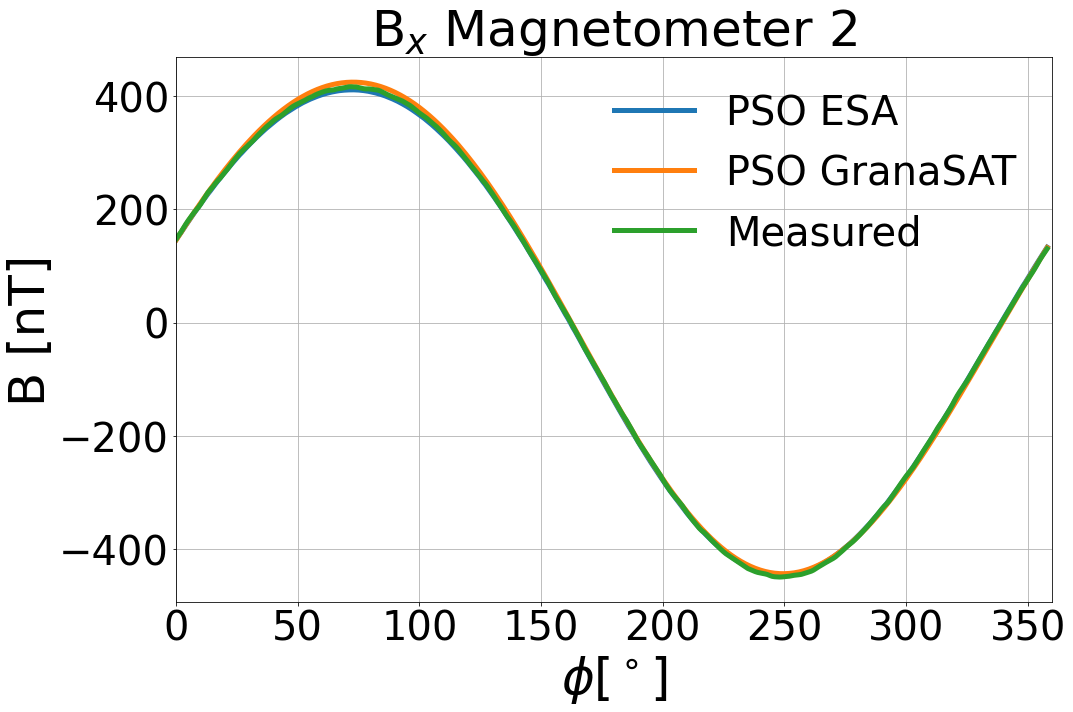

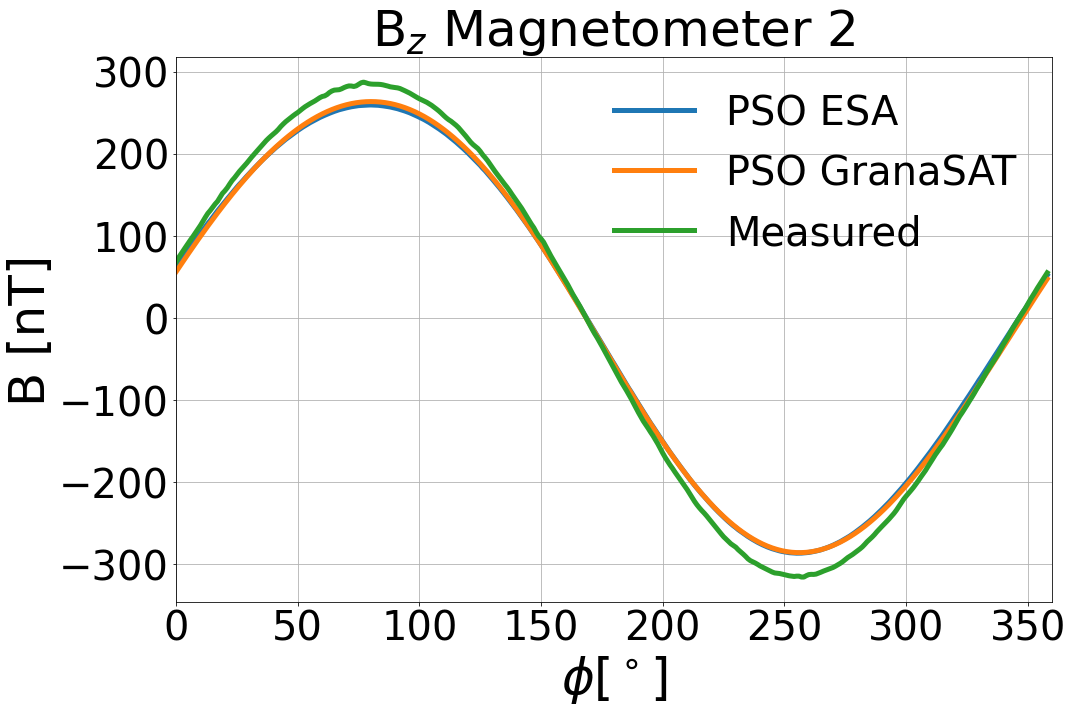

In [63]:
w=15
h=10
ts=40
ls=50
lw=5


#####
f = plt.figure()
f.set_figwidth(w)
f.set_figheight(h)

plt.title('B$_x$ Magnetometer 2',fontsize=ls)

plt.plot(phi[0:359], Bx_ESA[1][0:359], '-', label='PSO ESA',lw=lw)
if mode=='Compare':
    plt.plot(phi[0:359], Bx_PSO[0][1][0:359], '-', label='PSO 1Dip',lw=lw)
    plt.plot(phi[0:359], Bx_PSO[1][1][0:359], '-', label='PSO 2Dip',lw=lw)
    plt.plot(phi[0:359], Bx_PSO[2][1][0:359], '-', label='PSO 1Dip1Quad',lw=lw)
    
else:
    plt.plot(phi[0:359], Bx_PSO[1][0:359], '-', label='PSO GranaSAT',lw=lw)

plt.plot(phi[0:359], Bx_meas[1][0:359], '-', label='Measured',lw=lw)

plt.xlabel('$\phi [^\circ]$',fontsize=ls)
plt.ylabel('B [nT]',fontsize=ls)
plt.xticks(fontsize=ts)
plt.yticks(fontsize=ts)
plt.tight_layout()
plt.xlim([0,360])
leg=plt.legend(frameon=False,fontsize=ts)
plt.grid()
plt.tight_layout()
plt.savefig('IMAGES/Bx_Motor_Mag2.png', format='png')
plt.show()
#####
f = plt.figure()
f.set_figwidth(w)
f.set_figheight(h)

plt.title('B$_y$ Magnetometer 2',fontsize=ls)

plt.plot(phi[0:359], By_ESA[1][0:359], '-', label='PSO ESA',lw=lw)
if mode=='Compare':
    plt.plot(phi[0:359], By_PSO[0][1][0:359], '-', label='PSO 1Dip',lw=lw)
    plt.plot(phi[0:359], By_PSO[1][1][0:359], '-', label='PSO 2Dip',lw=lw)
    plt.plot(phi[0:359], By_PSO[2][1][0:359], '-', label='PSO 1Dip1Quad',lw=lw)
    
else:
    plt.plot(phi[0:359], By_PSO[1][0:359], '-', label='PSO GranaSAT',lw=lw)

plt.plot(phi[0:359], By_meas[1][0:359], '-', label='Measured',lw=lw)

plt.xlabel('$\phi [^\circ]$',fontsize=ls)
plt.ylabel('B [nT]',fontsize=ls)
plt.xticks(fontsize=ts)
plt.yticks(fontsize=ts)
plt.tight_layout()
plt.xlim([0,360])
leg=plt.legend(frameon=False,fontsize=ts)
plt.grid()
plt.tight_layout()
plt.savefig('IMAGES/By_Motor_Mag2.png', format='png')
plt.show()
#####
f = plt.figure()
f.set_figwidth(w)
f.set_figheight(h)

plt.title('B$_z$ Magnetometer 2',fontsize=ls)

plt.plot(phi[0:359], Bz_ESA[1][0:359], '-', label='PSO ESA',lw=lw)
if mode=='Compare':
    plt.plot(phi[0:359], Bz_PSO[0][1][0:359], '-', label='PSO 1Dip',lw=lw)
    plt.plot(phi[0:359], Bz_PSO[1][1][0:359], '-', label='PSO 2Dip',lw=lw)
    plt.plot(phi[0:359], Bz_PSO[2][1][0:359], '-', label='PSO 1Dip1Quad',lw=lw)
    
else:
    plt.plot(phi[0:359], Bz_PSO[1][0:359], '-', label='PSO GranaSAT',lw=lw)

plt.plot(phi[0:359], Bz_meas[1][0:359], '-', label='Measured',lw=lw)

plt.xlabel('$\phi [^\circ]$',fontsize=ls)
plt.ylabel('B [nT]',fontsize=ls)
plt.xticks(fontsize=ts)
plt.yticks(fontsize=ts)
plt.tight_layout()
plt.xlim([0,360])
leg=plt.legend(frameon=False,fontsize=ts)
plt.grid()
plt.tight_layout()
plt.savefig('IMAGES/Bz_Motor_Mag2.png', format='png')
plt.show()
#####


In [62]:
w=15
h=10
ts=40
ls=50
lw=5


#####
f = plt.figure()
f.set_figwidth(w)
f.set_figheight(h)

plt.title('Rel. Error B$_x$ Magnetometer 2',fontsize=ls)

plt.plot(phi[0:359], 100*Bx_ESA[1][0:359]/Bx_meas[1][0:359], '-', label='PSO ESA',lw=lw)
if mode=='Compare':
    plt.plot(phi[0:359], 100*Bx_PSO[0][1][0:359]/Bx_meas[1][0:359], '-', label='PSO 1Dip',lw=lw)
    plt.plot(phi[0:359], 100*Bx_PSO[1][1][0:359]/Bx_meas[1][0:359], '-', label='PSO 2Dip',lw=lw)
    plt.plot(phi[0:359], 100*Bx_PSO[2][1][0:359]/Bx_meas[1][0:359], '-', label='PSO 1Dip1Quad',lw=lw)
    
else:
    plt.plot(phi[0:359], 100*Bx_PSO[1][0:359]/Bx_meas[1][0:359], '-', label='PSO GranaSAT',lw=lw)


plt.xlabel('$\phi [^\circ]$',fontsize=ls)
plt.ylabel('Rel error [$\%$]',fontsize=ls)
plt.xticks(fontsize=ts)
plt.yticks(fontsize=ts)
plt.tight_layout()
plt.xlim([0,360])
leg=plt.legend(frameon=False,fontsize=ts)
plt.grid()
plt.tight_layout()
plt.savefig('IMAGES/Bx_Motor_Mag2_Errors.png', format='png')
plt.show()
#####
f = plt.figure()
f.set_figwidth(w)
f.set_figheight(h)

plt.title('Rel. Error B$_y$ Magnetometer 2',fontsize=ls)


plt.plot(phi[0:359], 100*By_ESA[1][0:359]/By_meas[1][0:359], '-', label='PSO ESA',lw=lw)
if mode=='Compare':
    plt.plot(phi[0:359], 100*By_PSO[0][1][0:359]/By_meas[1][0:359], '-', label='PSO 1Dip',lw=lw)
    plt.plot(phi[0:359], 100*By_PSO[1][1][0:359]/By_meas[1][0:359], '-', label='PSO 2Dip',lw=lw)
    plt.plot(phi[0:359], 100*By_PSO[2][1][0:359]/By_meas[1][0:359], '-', label='PSO 1Dip1Quad',lw=lw)
    
else:
    plt.plot(phi[0:359], 100*By_PSO[1][0:359]/By_meas[1][0:359], '-', label='PSO GranaSAT',lw=lw)



plt.xlabel('$\phi [^\circ]$',fontsize=ls)
plt.ylabel('Rel error [$\%$]',fontsize=ls)
plt.xticks(fontsize=ts)
plt.yticks(fontsize=ts)
plt.tight_layout()
plt.xlim([0,360])
leg=plt.legend(frameon=False,fontsize=ts)
plt.grid()
plt.tight_layout()
plt.savefig('IMAGES/By_Motor_Mag2_Errors.png', format='png')
plt.show()
#####
f = plt.figure()
f.set_figwidth(w)
f.set_figheight(h)

plt.title('Rel. Error B$_z$ Magnetometer 2',fontsize=ls)

plt.plot(phi[0:359], 100*Bz_ESA[1][0:359]/Bz_meas[1][0:359], '-', label='PSO ESA',lw=lw)
if mode=='Compare':
    plt.plot(phi[0:359], 100*Bz_PSO[0][1][0:359]/Bz_meas[1][0:359], '-', label='PSO 1Dip',lw=lw)
    plt.plot(phi[0:359], 100*Bz_PSO[1][1][0:359]/Bz_meas[1][0:359], '-', label='PSO 2Dip',lw=lw)
    plt.plot(phi[0:359], 100*Bz_PSO[2][1][0:359]/Bz_meas[1][0:359], '-', label='PSO 1Dip1Quad',lw=lw)
    
else:
    plt.plot(phi[0:359], 100*Bz_PSO[1][0:359]/Bz_meas[1][0:359], '-', label='PSO GranaSAT',lw=lw)


plt.xlabel('$\phi [^\circ]$',fontsize=ls)
plt.ylabel('Rel error [$\%$]',fontsize=ls)
plt.xticks(fontsize=ts)
plt.yticks(fontsize=ts)
plt.tight_layout()
plt.xlim([0,360])
leg=plt.legend(frameon=False,fontsize=ts)
plt.grid()
plt.tight_layout()
plt.savefig('IMAGES/Bz_Motor_Mag2_Errors.png', format='png')
plt.show()
#####


print(X_2_X[162],Y_2_X[162])

In [20]:
%run -i CountLines.py PSO_VICTOR_motor.ipynb

CODE LINES
1340
